<a href="https://colab.research.google.com/github/akramoo/AI-Bootcamp/blob/ML-Workshop/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/student-por.csv',sep=';')

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


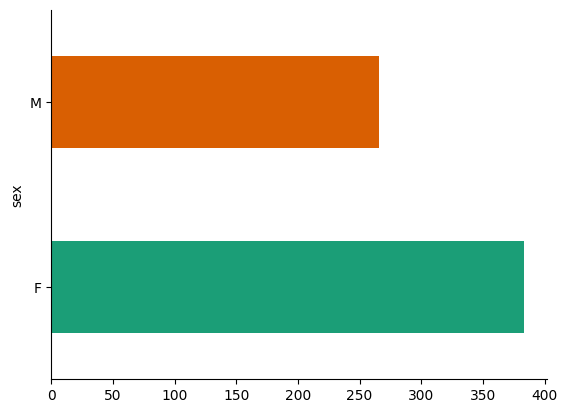

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

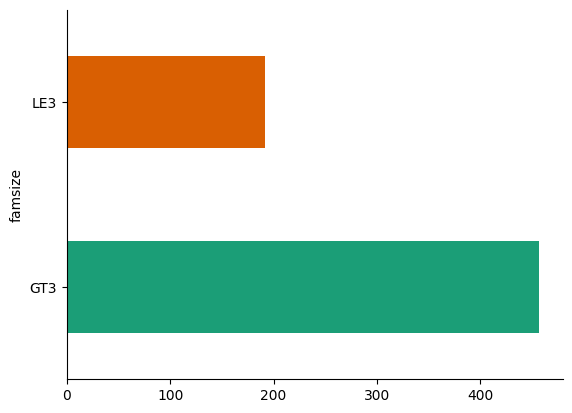

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('famsize').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
np.unique(data["Mjob"])

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [ ]:
pd.get_dummies(data, columns=["Mjob"])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,GP,F,18,U,GT3,A,4,4,teacher,course,...,3,4,0,11,11,1,0,0,0,0
1,GP,F,17,U,GT3,T,1,1,other,course,...,3,2,9,11,11,1,0,0,0,0
2,GP,F,15,U,LE3,T,1,1,other,other,...,3,6,12,13,12,1,0,0,0,0
3,GP,F,15,U,GT3,T,4,2,services,home,...,5,0,14,14,14,0,1,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,home,...,5,0,11,13,13,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,other,course,...,5,4,10,11,10,0,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,services,course,...,1,4,15,15,16,0,0,0,0,1
646,MS,F,18,U,GT3,T,1,1,other,course,...,5,6,11,12,9,0,0,1,0,0
647,MS,M,17,U,LE3,T,3,1,services,course,...,2,6,10,10,10,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data["Mjob"])
LabelEncoder()
list(le.classes_)
#le.transform(['at_home', 'health', 'other', 'services', 'teacher'])

['at_home', 'health', 'other', 'services', 'teacher']

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data_numeric=data.drop(['school', 'sex','address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'],axis=1)

In [ ]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   Medu        649 non-null    int64
 2   Fedu        649 non-null    int64
 3   traveltime  649 non-null    int64
 4   studytime   649 non-null    int64
 5   failures    649 non-null    int64
 6   famrel      649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  health      649 non-null    int64
 12  absences    649 non-null    int64
 13  G1          649 non-null    int64
 14  G2          649 non-null    int64
 15  G3          649 non-null    int64
dtypes: int64(16)
memory usage: 81.2 KB


In [ ]:
X = data_numeric.iloc[:,:15]
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,10,11
645,18,3,1,1,2,0,4,3,4,1,1,1,4,15,15
646,18,1,1,2,2,0,1,1,1,1,1,5,6,11,12
647,17,3,1,2,1,0,2,4,5,3,4,2,6,10,10


In [ ]:
Y = data_numeric.iloc[:,-1]
Y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, Y, test_size=0.40, random_state=42)

In [ ]:
X_train

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
404,17,2,1,1,2,0,4,3,5,2,4,4,4,12,16
46,16,3,3,1,2,0,2,3,5,1,4,3,6,13,12
261,17,2,1,3,2,0,2,1,1,1,1,3,2,13,13
195,16,3,3,1,2,0,4,2,3,1,2,3,0,11,12
648,18,3,2,3,1,0,4,4,1,3,4,5,4,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,15,4,2,1,4,0,3,3,3,1,1,3,0,11,9
106,15,2,2,1,4,0,5,1,2,1,1,3,4,10,10
270,16,4,4,1,1,0,5,3,2,1,2,5,4,14,15
435,15,1,1,2,2,0,5,4,3,1,2,4,0,10,10


In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
X_test

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
636,18,4,4,1,2,0,3,2,4,1,4,2,4,17,18
220,16,3,1,1,2,0,2,3,3,2,2,4,2,11,11
594,18,4,4,2,2,0,4,3,5,1,2,1,0,18,18
429,16,4,4,1,2,0,5,3,2,1,3,2,5,10,11
72,15,1,1,1,2,0,3,3,4,2,4,5,2,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,16,1,1,2,1,0,3,3,3,1,2,1,8,12,11
369,19,1,1,3,3,0,1,5,5,4,3,5,12,10,10
329,17,2,2,1,2,0,5,4,5,1,2,5,12,12,12
584,17,0,0,2,1,0,4,4,3,1,1,5,0,10,11


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

636    19
220    12
594    18
429    11
72     11
       ..
144    11
369    11
329    14
584    11
431    10
Name: G3, Length: 260, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.3